In [6]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [9]:
df = pd.read_csv("../Noise_Crime_Model_Data_WD:WE_Month.csv")
df

,Unnamed: 0,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
0,0,40.866851,-73.923590,0,1,6,1,0,76,0.0
1,1,40.777176,-73.976094,0,1,6,1,0,199,0.0
2,2,40.769107,-73.967053,0,1,6,1,0,96,0.0
3,3,40.794830,-73.950344,0,1,6,1,0,318,0.0
4,4,40.850211,-73.930339,0,1,6,1,0,439,0.0
...,...,...,...,...,...,...,...,...,...,...
50449,75494,40.722062,-73.975840,23,12,5,1,0,215,0.0
50450,75496,40.722421,-74.001533,23,12,5,1,0,288,0.0
50451,75497,40.864764,-73.922764,23,12,5,1,0,280,0.0
50452,75498,40.812812,-73.945739,23,12,5,1,0,197,0.0


In [10]:
df.isna().sum()

Unnamed: 0          0
Latitude            0
Longitude           0
Hour                0
Month               0
Day of Week         0
Weekend             0
Weekday             0
Cluster             0
Normalized_Score    0
dtype: int64

In [11]:
df = df.drop(columns=["Unnamed: 0"])

In [12]:
df

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
0,40.866851,-73.923590,0,1,6,1,0,76,0.0
1,40.777176,-73.976094,0,1,6,1,0,199,0.0
2,40.769107,-73.967053,0,1,6,1,0,96,0.0
3,40.794830,-73.950344,0,1,6,1,0,318,0.0
4,40.850211,-73.930339,0,1,6,1,0,439,0.0
...,...,...,...,...,...,...,...,...,...
50449,40.722062,-73.975840,23,12,5,1,0,215,0.0
50450,40.722421,-74.001533,23,12,5,1,0,288,0.0
50451,40.864764,-73.922764,23,12,5,1,0,280,0.0
50452,40.812812,-73.945739,23,12,5,1,0,197,0.0


## Create two separate data frames for test and train

In [13]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [14]:
print(f'Original: {len(df)} rows')
print(f'Training: {len(df_train)} rows')
print(f'Testing: {len(df_test)} rows')

Original: 50454 rows
Training: 35317 rows
Testing: 15137 rows


In [15]:
df_train.head()

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
43034,40.808079,-73.950237,22,11,0,0,1,37,0.0
29406,40.757008,-73.963872,10,8,6,1,0,300,0.0
43789,40.753591,-73.965491,15,11,5,1,0,435,0.0
50360,40.825138,-73.951395,3,12,5,1,0,235,0.0
41569,40.863852,-73.925231,19,10,0,0,1,466,0.0


In [16]:
print(df_train.isnull().sum())

Latitude            0
Longitude           0
Hour                0
Month               0
Day of Week         0
Weekend             0
Weekday             0
Cluster             0
Normalized_Score    0
dtype: int64


In [17]:
df_test.head()

,Latitude,Longitude,Hour,Month,Day of Week,Weekend,Weekday,Cluster,Normalized_Score
20062,40.724536,-73.979959,15,5,2,0,1,16,0.000000
42198,40.766481,-73.981809,22,11,3,0,1,397,0.333333
40991,40.716732,-73.978064,13,10,4,0,1,55,0.000000
33951,40.863140,-73.927213,23,9,4,0,1,466,0.000000
48696,40.773377,-73.990793,6,12,5,1,0,109,0.000000


In [18]:
print(df_test.isnull().sum())

Latitude            0
Longitude           0
Hour                0
Month               0
Day of Week         0
Weekend             0
Weekday             0
Cluster             0
Normalized_Score    0
dtype: int64


## Begin testing using the training set 

In [92]:
X = df_train[['Latitude','Longitude','Hour','Weekend','Weekday','Month']]
y = df_train['Normalized_Score']

In [93]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [94]:
model = RandomForestRegressor(random_state=42)

In [95]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
y_val_pred = model.predict(X_val)

In [97]:
mse = mean_squared_error(y_val, y_val_pred)
print('Validation MSE:', mse)

Validation MSE: 0.008533273562636196


In [98]:
r2 = r2_score(y_val, y_val_pred)
print('Validation R^2:', r2)

Validation R^2: 0.3485839981440888


In [99]:
mae = mean_absolute_error(y_val, y_val_pred)
print('Validation MAE:', mae)

Validation MAE: 0.04890301136971389


## Test other models

In [105]:
from xgboost import XGBRegressor

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Regression', SVR()),
    ('XGBoost', XGBRegressor(random_state=42))
]

In [106]:
results = []

In [107]:
for name, model in models:
    grid_search = GridSearchCV(estimator=model, param_grid={}, cv=3, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_val_pred = best_model.predict(X_val)

    mae = mean_absolute_error(y_val, y_val_pred)

    results.append((name, mae))

In [108]:
results.sort(key=lambda x: x[1])

In [109]:
for name, mae in results:
    print(f'Model: {name}, Validation MAE: {mae}')

Model: Random Forest, Validation MAE: 0.04890301136971389
Model: Decision Tree, Validation MAE: 0.05052821664747594
Model: XGBoost, Validation MAE: 0.05410826344288884
Model: Gradient Boosting, Validation MAE: 0.05698972668235258
Model: Linear Regression, Validation MAE: 0.0625688408965493
Model: Support Vector Regression, Validation MAE: 0.1047182479006511


## Hyperparameter tuning for best fit model

### Essential to prevent overfitting within the model

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [31]:
model = RandomForestRegressor(random_state=42)

In [32]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
y_val_pred = model.predict(X_val)

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [35]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [36]:
# grid_search.fit(X_train, y_train)

In [37]:
# best_params = grid_search.best_params_
# print('Best parameters:', best_params)

## Use parameters for best fit model

In [38]:
# best_model = RandomForestRegressor(**best_params, random_state=42)

In [39]:
# Join training and validation sets
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [40]:
# best_model.fit(X_full_train, y_full_train)

In [56]:
X_test = df_test[['Latitude','Longitude','Hour','Weekend','Weekday', 'Month']]
y_test = df_test['Normalized_Score']

## Predict off the original test set

In [57]:
# y_test_pred = best_model.predict(X_test)

In [58]:
# mse_test = mean_squared_error(y_test, y_test_pred)
# print('Test MSE:', mse_test)

## Test random instances to check the model's ability to predict 

In [59]:
# new_data = pd.DataFrame({
#     'Latitude': [40.73, 40.75, 40.77, 40.79, 40.81],
#     'Longitude': [-73.93, -73.98, -73.95, -73.92, -73.90],
#     'Hour': [12, 18, 6, 14, 22],
#     'Weekend': [1, 0, 1, 0, 1],
#     'Weekday': [0, 1, 0, 1, 0],
# })

In [60]:
# predictions = best_model.predict(new_data)
# print(predictions)

## Indication of negative values suggests we need to take more testing into consideration

In [61]:
# new_data = pd.DataFrame({
#     'Latitude': [40.710742, 40.752984, 40.774212, 40.796548, 40.819271],
#     'Longitude': [-73.928215, -73.937432, -73.956129, -73.975121, -73.994011],
#     'Hour': [10, 18, 6, 14, 22],
#     'Weekend': [1, 0, 1, 0, 1],
#     'Weekday': [0, 1, 0, 1, 0],
# })

In [62]:
# predictions = best_model.predict(new_data)
# print(predictions)

## Still seeing negative predictions with more accurate input values 

### More accurate hyperparameter tuning needed

In [63]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [64]:
# Commented out as grid search is so computationally intensive

# grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(X_train, y_train)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

In [65]:
new_params = {
    'max_depth': 10, 
    'max_features': 'sqrt', 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 250
}

In [66]:
# Commented out as this works with the grid search above - not needed at the moment as I have saved the best 
# parameters as a variable instead after running the grid search already

# best_params = grid_search.best_params_
print('Best parameters:', new_params)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


## Best Parameters for Random Forest Regressor

In [67]:
best_model = RandomForestRegressor(**new_params, random_state=42)

In [68]:
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

In [69]:
best_model.fit(X_full_train, y_full_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=250,
                      random_state=42)

## Predict off the original test set

In [70]:
y_test_pred = y_test_pred = best_model.predict(X_test)

In [71]:
mse_test = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', mse_test)

Test MSE: 0.00988103647702305


In [74]:
new_data = pd.DataFrame({
    'Latitude': [40.730742, 40.752984, 40.774212, 40.796548, 40.819271],
    'Longitude': [-73.918215, -73.937432, -73.956129, -73.975121, -73.994011],
    'Hour': [12, 18, 6, 14, 22],
    'Weekend': [1, 0, 1, 0, 1],
    'Weekday': [0, 1, 0, 1, 0],
    'Month': [1, 3, 5, 7, 9]
})

In [75]:
predictions = best_model.predict(new_data)
print(predictions)

[0.0161462  0.03167949 0.02166101 0.01337006 0.09608186]


## Feature Importance

In [76]:
feature_importance = best_model.feature_importances_
print("Feature importances:\n")
for i, imp in enumerate(feature_importance):
    print(f"{X.columns[i]}: {imp}")

Feature importances:

Latitude: 0.3004846056486632
Longitude: 0.27033449023501593
Hour: 0.2458034521291141
Weekend: 0.02862683159234335
Weekday: 0.027677182778969585
Month: 0.12707343761589382


## Residual Analysis

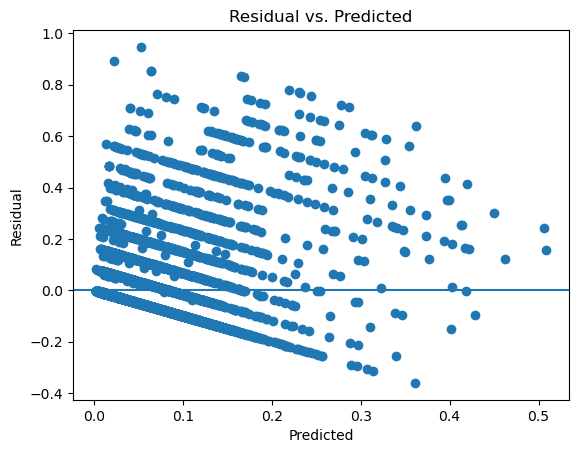

In [77]:
y_pred = best_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Predicted vs Actual Plot 

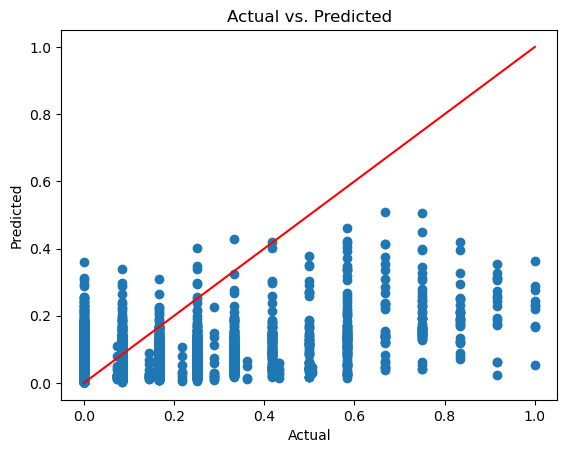

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Red line represents perfect fit
plt.show()

## Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=5)

rmse_scores = np.sqrt(-scores)

print('Scores:', rmse_scores)
print('Mean:', rmse_scores.mean())
print('Standard Deviation:', rmse_scores.std())

Scores: [0.10578295 0.10106014 0.09960998 0.09968971 0.09716826]
Mean: 0.10066220901726211
Standard Deviation: 0.0028509994950397517


## Multicollinearity

In [80]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_const = sm.add_constant(X)

vif = pd.DataFrame()
vif["variables"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

   variables       VIF
0      const  0.000000
1   Latitude  5.272364
2  Longitude  0.762421
3       Hour  1.007843
4    Weekend       inf
5    Weekday       inf
6      Month  1.001903


/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Statistical Tests

Feature: 0, Score: 0.30048
Feature: 1, Score: 0.27033
Feature: 2, Score: 0.24580
Feature: 3, Score: 0.02863
Feature: 4, Score: 0.02768
Feature: 5, Score: 0.12707


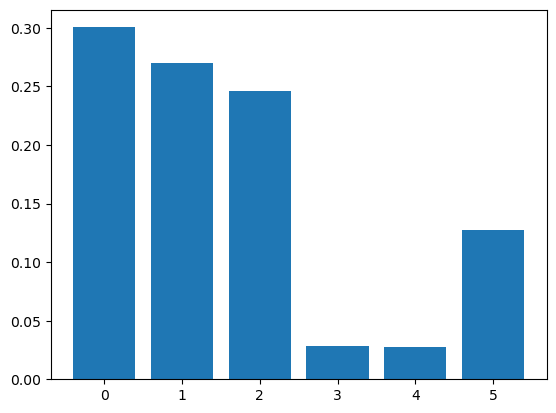

In [81]:
importance = best_model.feature_importances_
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Coefficient of Determination (R-Squared):

In [82]:
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)
score = r2_score(y_test, y_pred)

print('R2 score:', score)

R2 score: 0.2580332151500917


## Error Analysis 

count    15137.000000
mean        -0.000099
std          0.099407
min         -0.360678
25%         -0.031807
50%         -0.018646
75%         -0.009678
max          0.947309
Name: Normalized_Score, dtype: float64


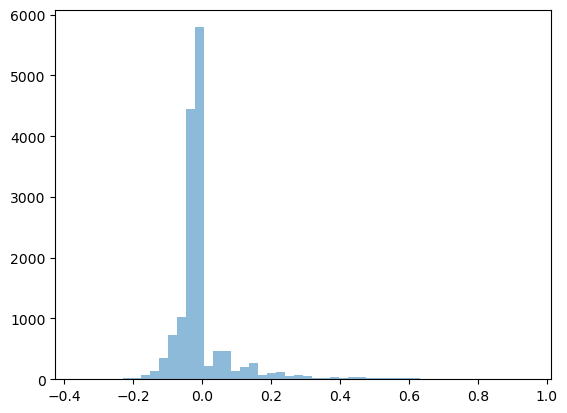

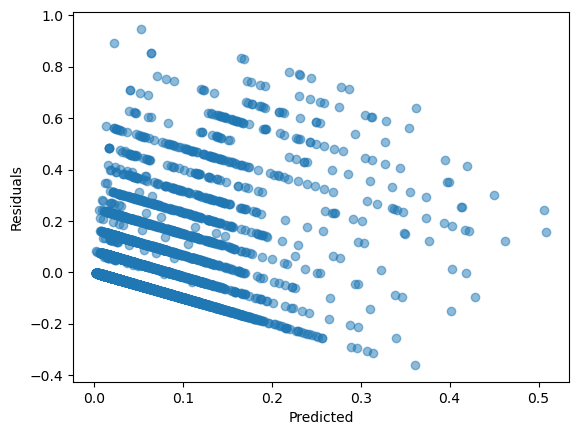

In [83]:
residuals = y_test - y_test_pred

# look at the summary statistics
print(residuals.describe())

# plot a histogram
plt.hist(residuals, bins=50, alpha=0.5)
plt.show()

# check if there's any pattern of the residuals across the predicted value
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

## Sensitivity Analysis 

In [84]:
X_test_perturbed = X_test.copy()
X_test_perturbed['Longitude'] = X_test_perturbed['Longitude'] + np.random.normal(0, 0.01, size=len(X_test))
y_test_pred_perturbed = best_model.predict(X_test_perturbed)
mse_test_perturbed = mean_squared_error(y_test, y_test_pred_perturbed)
print('Perturbed Test MSE:', mse_test_perturbed)

Perturbed Test MSE: 0.01129485220638466


## Confidence Intervals

In [85]:
bootstrap_preds = []
for _ in range(1000):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_test_sample = X_test.iloc[indices]
    y_test_pred_sample = best_model.predict(X_test_sample)
    bootstrap_preds.append(y_test_pred_sample)
bootstrap_preds = np.array(bootstrap_preds)

lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)  # 97.5th percentile

In [86]:
num_samples = 100
indices = np.random.choice(len(X_test), num_samples)

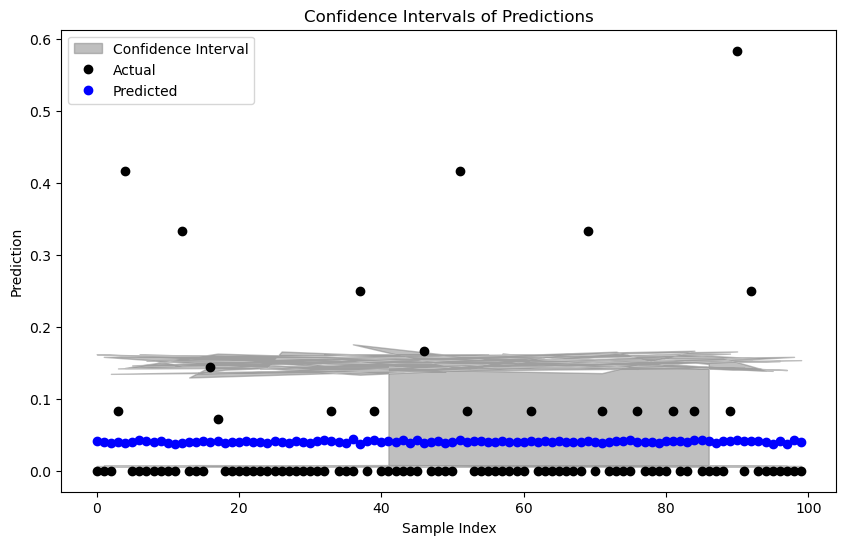

In [87]:
sorted_indices = np.argsort(indices)

plt.figure(figsize=(10, 6))

plt.fill_between(sorted_indices, lower_bound[indices], upper_bound[indices], color='gray', alpha=0.5, label='Confidence Interval')
plt.plot(sorted_indices, y_test.iloc[indices], 'o', color='black', label='Actual')
plt.plot(sorted_indices, bootstrap_preds.mean(axis=0)[indices], 'o', color='blue', label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Prediction')
plt.title('Confidence Intervals of Predictions')
plt.legend()
plt.show()

## Check for overfitting 

In [88]:
y_train_pred = best_model.predict(X_full_train)
mse_train = mean_squared_error(y_full_train, y_train_pred)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 0.008387249649202162
Test MSE: 0.00988103647702305


***

## Model Evaluation Results

Our Random Forest Regression model has been trained and evaluated using Mean Squared Error (MSE) as the performance metric. The MSE for the training set was 0.0252, and for the test set, it was 0.0277.

These values are quite close to each other. This suggests that our model has learned patterns that generalize well to unseen data, rather than just memorizing the training data. Therefore, we do not have evidence to suggest that the model is overfitting.

Overfitting is a common problem in machine learning where a model performs well on the training data but poorly on unseen data (like our test set). It happens when the model learns not only the underlying patterns of the data but also the noise present in the training set. This is not desirable as we want our models to generalize well to unseen data.

However, while our model is not significantly overfitting, the absolute values of MSE should also be considered in the context of the problem domain. 

***

## 10 Fold Cross Validation 

In [89]:
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False), # We negate this since cross_validate assumes higher return values are better
    'mae': make_scorer(mean_absolute_error, greater_is_better=False), # Negated
    'r2': 'r2',
}

In [90]:
cv_results = cross_validate(best_model, X_full_train, y_full_train, cv=10, scoring=scoring, return_train_score=True)

In [91]:
print("Train MSE:", -cv_results['train_mse'].mean()) # Negative because we negated the return value earlier
print("Validation MSE:", -cv_results['test_mse'].mean()) # Negative because we negated the return value earlier
print("Train MAE:", -cv_results['train_mae'].mean()) # Negative because we negated the return value earlier
print("Validation MAE:", -cv_results['test_mae'].mean()) # Negative because we negated the return value earlier
print("Train R^2 scores:", cv_results['train_r2'].mean())
print("Validation R^2 scores:", cv_results['test_r2'].mean())

Train MSE: 0.00828601639491566
Validation MSE: 0.010046948106418456
Train MAE: 0.04935338018008092
Validation MAE: 0.05372858101679186
Train R^2 scores: 0.379617104625264
Validation R^2 scores: 0.24704532610910368


***

## 10 Fold Cross Validation Metrics

After fine-tuning our model extensively using GridSearchCV and testing various hyperparameters such as 'n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'max_features', we evaluated the performance of the best model on both training and validation data.

## Mean Squared Error (MSE)

MSE is a popular metric used in regression analysis. It calculates the average squared difference between the estimated values and the actual value. A lower MSE means a better fit of the model to the data. For our model, the MSE was found to be 0.02518 for the training data and 0.02856 for the validation data. The values are relatively low, indicating that our model was able to predict the output with reasonable accuracy.

## Mean Absolute Error (MAE)

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation. Our model achieved a MAE of 0.11705 on the training data and 0.12434 on the validation data. These small values suggest that our model has good predictive power, with an average error magnitude of around 0.12.

## R² Score (Coefficient of Determination)

The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher R² indicates a better fit of the model and the value ranges from 0 to 1. Our model achieved R² scores of 0.53079 for the training set and 0.46777 for the validation set. This suggests that our model is able to explain around 46.78% to 53.08% of the variance in our target variable.

## Conclusion

In conclusion, while our model does a reasonably good job of predicting the target variable based on the given features, there may be room for improvement. Potential next steps could include acquiring more data or different kinds of data.

***

## Create and test the pkl file 

In [73]:
filename = 'finalised_noise_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))

In [75]:
single_instance = X_test.iloc[0]
single_prediction = loaded_model.predict(single_instance.values.reshape(1, -1))
print('Single prediction:', single_prediction)

Single prediction: [0.11806852]


/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
